In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models
from scipy import optimize
from Pymod import prep
from plotter import semlog
%matplotlib inline
%load_ext autoreload

In [2]:
WT_11_lbl, WT_11_rtot, WT_11_lig, WT_11_sat = prep.datprep('Data/EGFR_WT_11_Sat.csv','Data/EGFR_WT_11_Rtot.csv')

hootie hoo! the indices match!


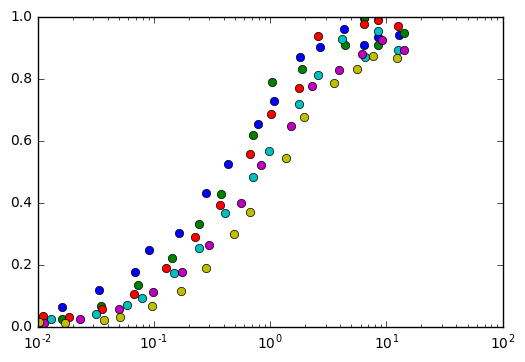

In [3]:
semlog(WT_11_lig,WT_11_sat)

In [4]:
WT_11_lbl

['12k', '82k', '107k', '387k', '502k', '1600k']

In [5]:
k11r = np.clip(np.random.normal(3.4,0.34,10000),0.0001,np.inf)
k21r = np.clip(np.random.normal(1.1,0.11,10000),0.0001,np.inf)
k22r = np.clip(np.random.normal(0.15,0.05,10000),0.0001,np.inf)
l20r = np.clip(np.random.normal(240.,84.,10000),0.0001,np.inf)

In [6]:
parmset = np.stack([k11r,k21r,k22r,l20r],1)

In [7]:
rtot_guess = np.array([0.001,0.002,0.003,0.005,0.01,0.03])

In [8]:
bounds1 = tuple(0.0 for i in range(6)),tuple(1.0 for i in range(6))

In [9]:
res = [optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds1,args=(WT_11_lig,WT_11_sat,i)).x for i in parmset]

In [10]:
resar = np.array(res)

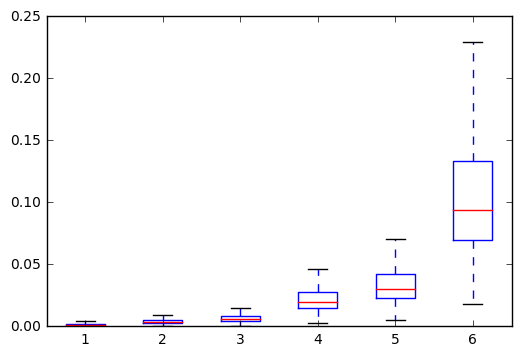

In [11]:
boxp = plt.boxplot(resar, showfliers=False)

In [12]:
np.median(resar,axis=0)

array([ 0.00121548,  0.00358532,  0.0061891 ,  0.01986641,  0.03042073,
        0.09414331])

In [13]:
WT_11_Parms = np.array([3.4,1.1,0.15,240.])

In [14]:
res2 = optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds1,args=(WT_11_lig,WT_11_sat,WT_11_Parms))

In [15]:
res2.x

array([ 0.0011934 ,  0.00351278,  0.00608286,  0.01967875,  0.03012644,
        0.09250139])